In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import aux_functions as aux
import plotting_functions as plots

%matplotlib inline

In [2]:
main_data, keys = aux.prepare_data()
yippy_liked = main_data[keys['remarks_yippy'][0]].dropna()

In [3]:
text = " ".join(yippy_liked)

In [4]:
tokenized_word=word_tokenize(text)
print(tokenized_word)

['The', 'suggestion', 'of', 'clusters', 'cluster', 'allows', 'to', 'find', 'similar', 'topics', 'related', 'to', 'search', '.', 'Handy', 'for', 'studying', 'News', 'seemed', 'to', 'be', 'more', 'relevant', ',', 'whereas', 'google', 'showed', 'outdated', 'news', 'like', 'how', 'clustering', 'feature', 'helps', 'narrow', 'down', 'search', 'The', 'Clusters', 'section', 'there', 'are', 'sub-categories', 'for', 'the', 'search', 'Numbering', 'of', 'results', '.', 'Less', 'comercial', 'than', 'GOogle', '.', 'the', 'clustering', 'is', 'very', 'useful', 'and', 'the', 'results', 'are', 'pretty', 'relevant', 'The', 'clustering', 'feature', 'The', 'cluster', 'widget', 'really', 'helps', 'you', 'finding', 'similar', 'topics', ',', 'this', 'is', 'useful', 'specially', 'for', 'researching', 'purposes', 'The', 'cluster', 'option', ',', 'some', 'of', 'the', 'clusters', 'are', 'useful', 'for', 'the', 'search', 'Nothing', 'in', 'particular', '.', 'the', 'clusters', 'were', 'nice', 'provides', 'more', 'de

In [5]:
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 129 samples and 229 outcomes>


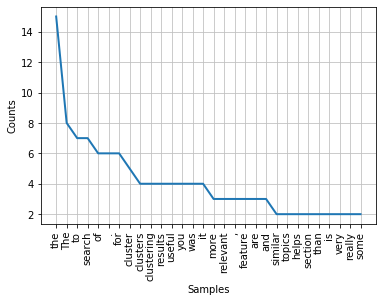

In [6]:
fdist.plot(30,cumulative=False)
plt.show()

In [7]:
stop_words=set(stopwords.words("english"))
print(stop_words)

{'don', 'these', 'we', 'theirs', 'hasn', 'there', 'again', 're', "couldn't", 'shouldn', 'few', 'off', 'now', 'this', 'when', "didn't", 'didn', "won't", 'ain', 'yourselves', 'can', 'hadn', 'does', 'yours', 'or', 'own', 'after', 'how', 'not', 'most', 'wouldn', 'more', 'where', 'whom', 'the', 'then', 'of', 'are', 'shan', 'until', 'y', 'above', 'some', 'once', 'why', 'out', 'you', 'which', 'she', 'am', "you're", 'before', 's', "you've", "needn't", 'doesn', 'its', 'was', 'down', 'itself', 'for', 'in', 'on', 'between', 'against', 'have', 'those', "aren't", 'because', "wouldn't", 'same', 'were', 'other', "you'll", 'up', 'no', 'only', 'from', 'o', "it's", 'yourself', 'his', "that'll", 'will', 'having', 'very', 'aren', 'over', "shan't", 'what', 'mustn', 'both', 'he', 'weren', 'any', 'ma', 'while', 'them', 'about', 'themselves', 'at', 'd', "mustn't", "wasn't", "haven't", 'wasn', 'i', 'has', 'through', 'our', 'been', 'an', 'here', 'is', 'being', 'below', 'during', "she's", 'but', 't', 'as', 'with

In [8]:
filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)
print("Filterd Sentence:",filtered_sent)

Filterd Sentence: ['The', 'suggestion', 'clusters', 'cluster', 'allows', 'find', 'similar', 'topics', 'related', 'search', '.', 'Handy', 'studying', 'News', 'seemed', 'relevant', ',', 'whereas', 'google', 'showed', 'outdated', 'news', 'like', 'clustering', 'feature', 'helps', 'narrow', 'search', 'The', 'Clusters', 'section', 'sub-categories', 'search', 'Numbering', 'results', '.', 'Less', 'comercial', 'GOogle', '.', 'clustering', 'useful', 'results', 'pretty', 'relevant', 'The', 'clustering', 'feature', 'The', 'cluster', 'widget', 'really', 'helps', 'finding', 'similar', 'topics', ',', 'useful', 'specially', 'researching', 'purposes', 'The', 'cluster', 'option', ',', 'clusters', 'useful', 'search', 'Nothing', 'particular', '.', 'clusters', 'nice', 'provides', 'detailed', 'info', 'search', 'clustering', 'speed', 'nothing', 'really', 'results', 'search', 'way', 'good', 'part', 'didnt', 'take', 'long', 'load', 'results', 'Gave', 'specific', 'article', 'The', 'cluster', 'feature', 'useful'

In [9]:
ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['The', 'suggestion', 'clusters', 'cluster', 'allows', 'find', 'similar', 'topics', 'related', 'search', '.', 'Handy', 'studying', 'News', 'seemed', 'relevant', ',', 'whereas', 'google', 'showed', 'outdated', 'news', 'like', 'clustering', 'feature', 'helps', 'narrow', 'search', 'The', 'Clusters', 'section', 'sub-categories', 'search', 'Numbering', 'results', '.', 'Less', 'comercial', 'GOogle', '.', 'clustering', 'useful', 'results', 'pretty', 'relevant', 'The', 'clustering', 'feature', 'The', 'cluster', 'widget', 'really', 'helps', 'finding', 'similar', 'topics', ',', 'useful', 'specially', 'researching', 'purposes', 'The', 'cluster', 'option', ',', 'clusters', 'useful', 'search', 'Nothing', 'particular', '.', 'clusters', 'nice', 'provides', 'detailed', 'info', 'search', 'clustering', 'speed', 'nothing', 'really', 'results', 'search', 'way', 'good', 'part', 'didnt', 'take', 'long', 'load', 'results', 'Gave', 'specific', 'article', 'The', 'cluster', 'feature', 'useful

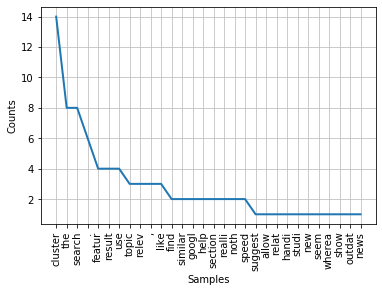

In [10]:
fdist_stemmed = FreqDist(stemmed_words)
fdist_stemmed.plot(30,cumulative=False)
plt.show()

In [11]:
fdist_pandas = pd.Series(fdist_stemmed, name='word_freqs')
fdist_pandas.keys()

Index(['the', 'suggest', 'cluster', 'allow', 'find', 'similar', 'topic',
       'relat', 'search', '.', 'handi', 'studi', 'new', 'seem', 'relev', ',',
       'wherea', 'googl', 'show', 'outdat', 'news', 'like', 'featur', 'help',
       'narrow', 'section', 'sub-categori', 'number', 'result', 'less',
       'comerci', 'use', 'pretti', 'widget', 'realli', 'special', 'research',
       'purpos', 'option', 'noth', 'particular', 'nice', 'provid', 'detail',
       'info', 'speed', 'way', 'good', 'part', 'didnt', 'take', 'long', 'load',
       'gave', 'specif', 'articl', 'faster', 'expect', 'organis', 'side', 'UI',
       'It', 'creat', 'nich', 'make', 'easier', 'tool', 'overal', 'mayb',
       'propos', 'phrase', 'fact', 'choos', 'want', 'engin', 'yo', 'focu',
       'saw', 'qualiti', 'contenct', 'I', 'wide', 'rang', 'differ', 'web',
       'site', 'refer'],
      dtype='object')

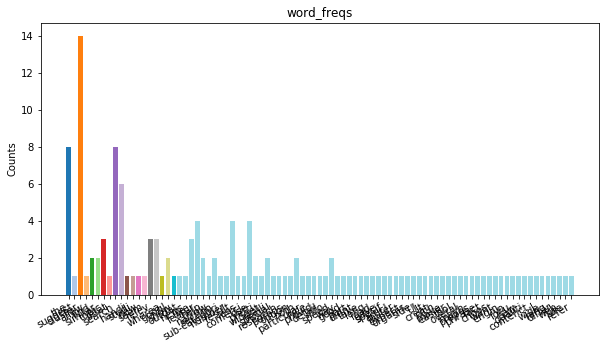

In [12]:
fig = plots.make_plot(fdist_pandas, counted=True, kind='bar', fig_kwargs=dict(figsize=(10,5)), break_labels=False)